<a href="https://colab.research.google.com/github/Dattasai134/Netflix-Movies-and-Shows-IMbd-Scores-Analysis/blob/main/Netfilx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/Netflix TV Shows and Movies.csv')

# Display the first 5 rows
display(df.head())

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0


In [3]:
# Display data types and non-null values
display(df.info())

# Display descriptive statistics
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5278 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  2998 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 454.1+ KB


None

,index,release_year,runtime,imdb_score,imdb_votes
count,5283.000000,5283.000000,5283.000000,5283.000000,5.267000e+03
mean,2641.000000,2015.879992,79.199886,6.533447,2.340719e+04
std,1525.215067,7.346098,38.915974,1.160932,8.713432e+04
min,0.000000,1953.000000,0.000000,1.500000,5.000000e+00
25%,1320.500000,2015.000000,45.000000,5.800000,5.210000e+02
50%,2641.000000,2018.000000,87.000000,6.600000,2.279000e+03
75%,3961.500000,2020.000000,106.000000,7.400000,1.014400e+04
max,5282.000000,2022.000000,235.000000,9.600000,2.268288e+06


In [4]:
# Check for missing values
display(df.isnull().sum())

,0
index,0
id,0
title,0
type,0
description,5
release_year,0
age_certification,2285
runtime,0
imdb_id,0
imdb_score,0


In [8]:
# Impute missing values with the mode for specified columns
for column in ['description', 'age_certification', 'imdb_votes']:
  if df[column].isnull().sum() > 0:
    mode_value = df[column].mode()[0]
    df[column] = df[column].fillna(mode_value)

# Verify that missing values have been handled
display(df.isnull().sum())

,0
index,0
id,0
title,0
type,0
description,0
release_year,0
age_certification,0
runtime,0
imdb_id,0
imdb_score,0


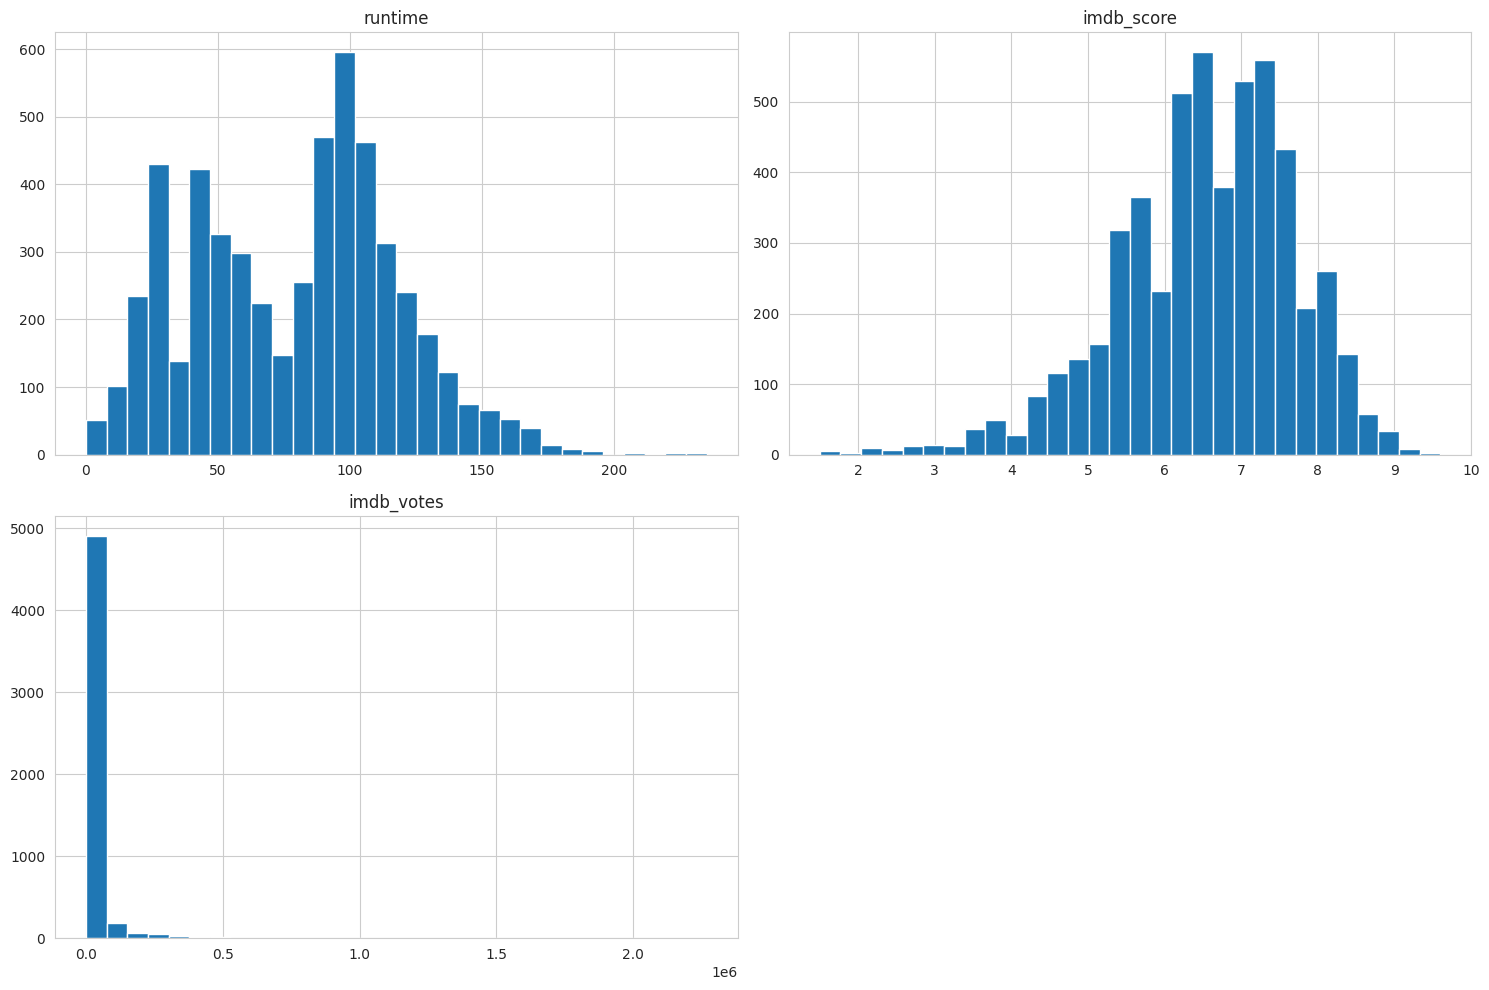

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style("whitegrid")

# Create histograms for numerical columns
numerical_cols = ['runtime', 'imdb_score', 'imdb_votes']
df[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

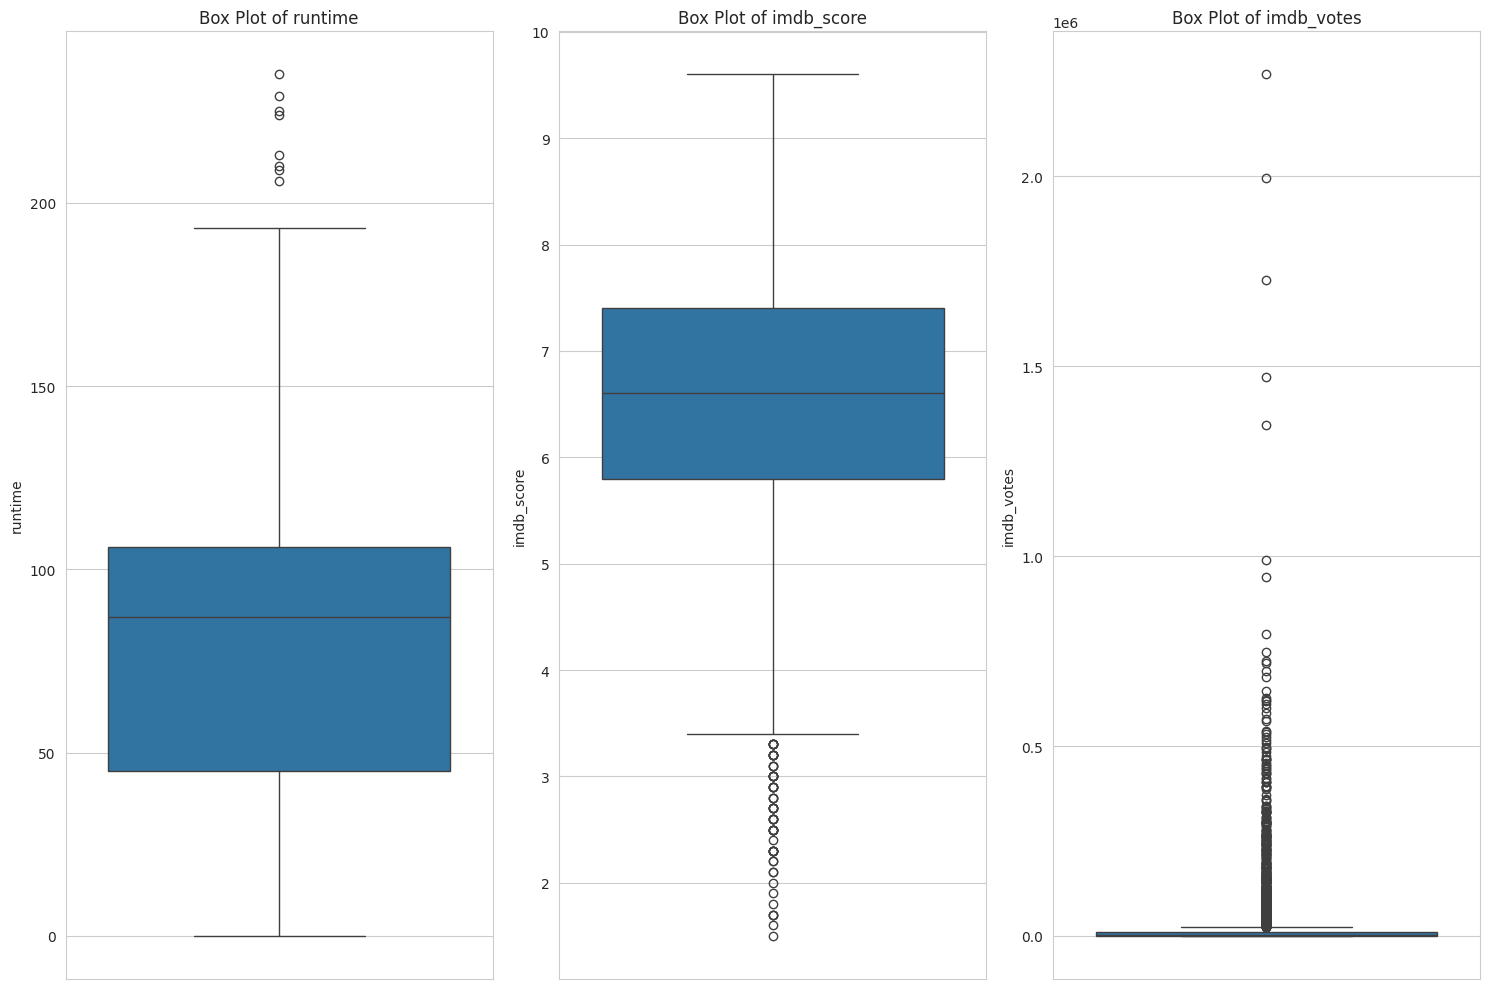

In [10]:
# Create box plots for numerical columns to visualize outliers
numerical_cols = ['runtime', 'imdb_score', 'imdb_votes']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

In [11]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
    return outliers

# Impute outliers with the median
numerical_cols = ['runtime', 'imdb_score', 'imdb_votes']
for col in numerical_cols:
    outlier_indices = detect_outliers_iqr(df, col)
    median_value = df[col].median()
    df.loc[outlier_indices, col] = median_value

# Verify that outliers have been imputed (visual inspection or checking summary statistics)
display(df[numerical_cols].describe())

,runtime,imdb_score,imdb_votes
count,5283.000000,5283.000000,5283.000000
mean,79.000189,6.581336,3488.881507
std,38.533170,1.076884,4804.437770
min,0.000000,3.400000,5.000000
25%,45.000000,5.900000,506.500000
50%,87.000000,6.600000,2256.000000
75%,106.000000,7.400000,3812.500000
max,193.000000,9.600000,24479.000000


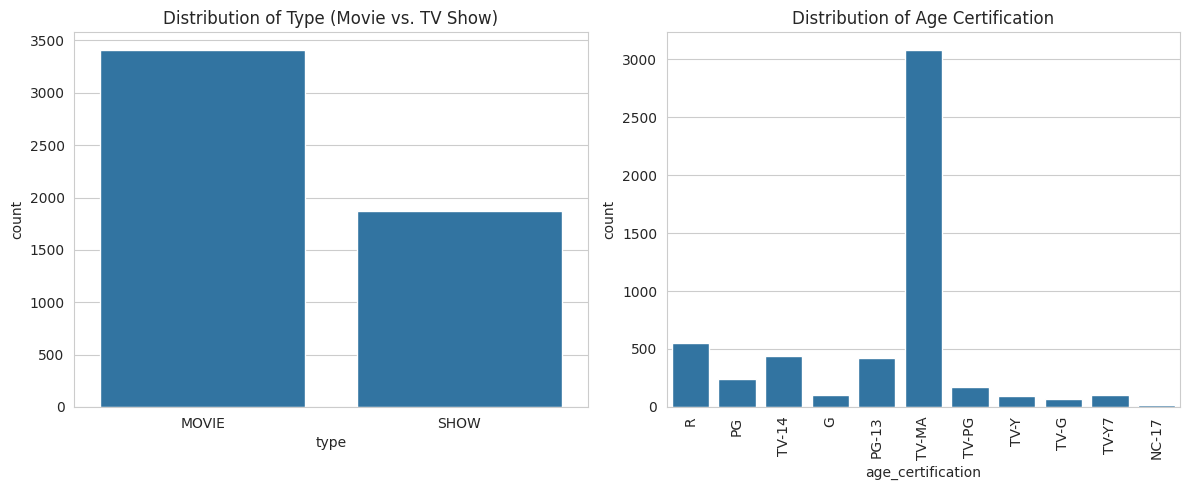

In [12]:
# Visualize the distribution of categorical variables
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='type')
plt.title('Distribution of Type (Movie vs. TV Show)')

plt.subplot(1, 2, 2)
plt.xticks(rotation=90)
sns.countplot(data=df, x='age_certification')
plt.title('Distribution of Age Certification')

plt.tight_layout()
plt.show()

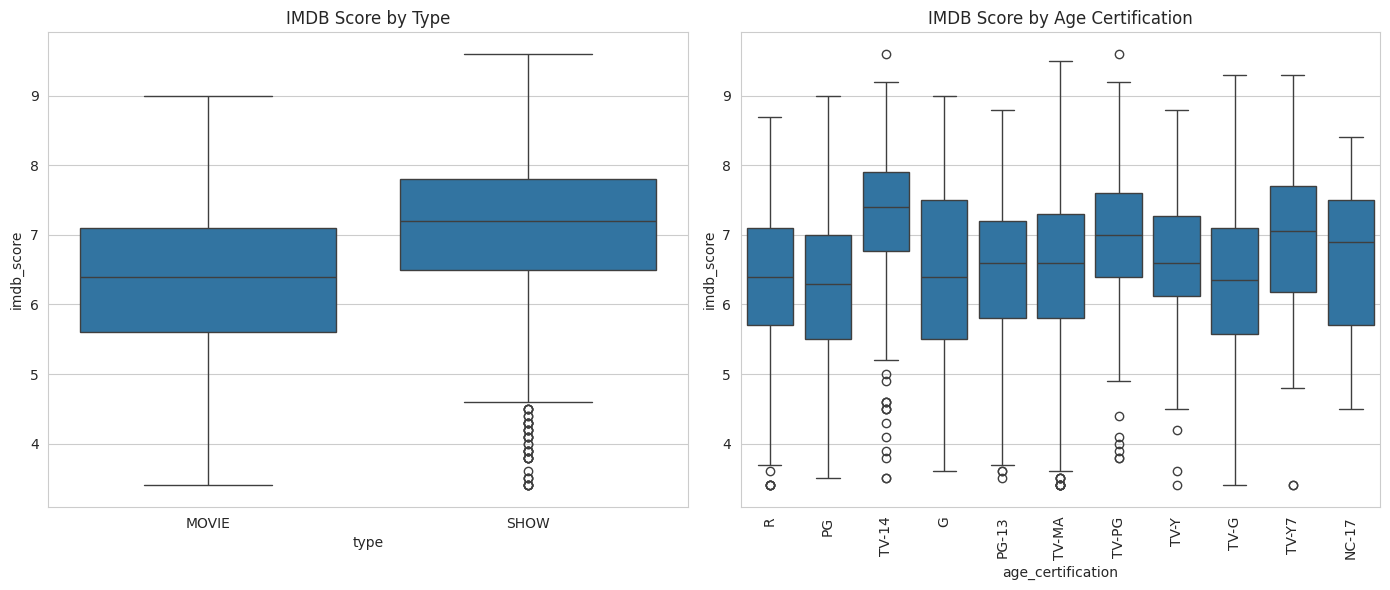

In [13]:
# Explore the relationship between imdb_score and categorical variables
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='type', y='imdb_score')
plt.title('IMDB Score by Type')

plt.subplot(1, 2, 2)
plt.xticks(rotation=90)
sns.boxplot(data=df, x='age_certification', y='imdb_score')
plt.title('IMDB Score by Age Certification')

plt.tight_layout()
plt.show()

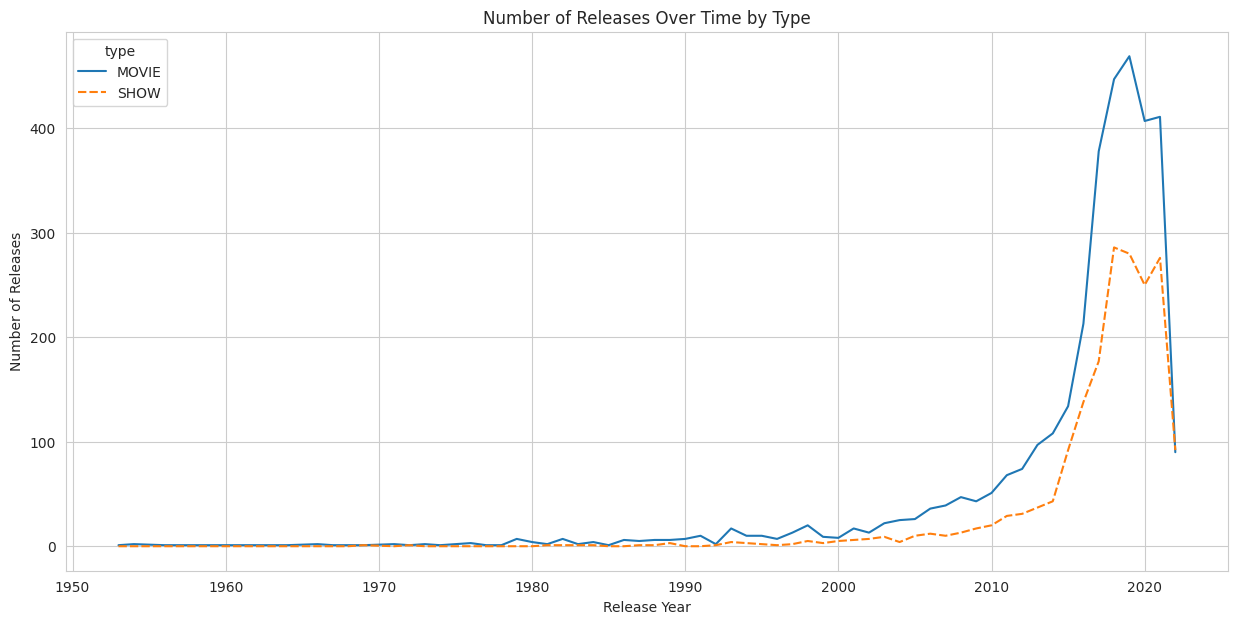

In [14]:
# Visualize the trend of releases over time for different types
releases_over_time = df.groupby(['release_year', 'type']).size().unstack(fill_value=0)

plt.figure(figsize=(15, 7))
sns.lineplot(data=releases_over_time)
plt.title('Number of Releases Over Time by Type')
plt.xlabel('Release Year')
plt.ylabel('Number of Releases')
plt.show()

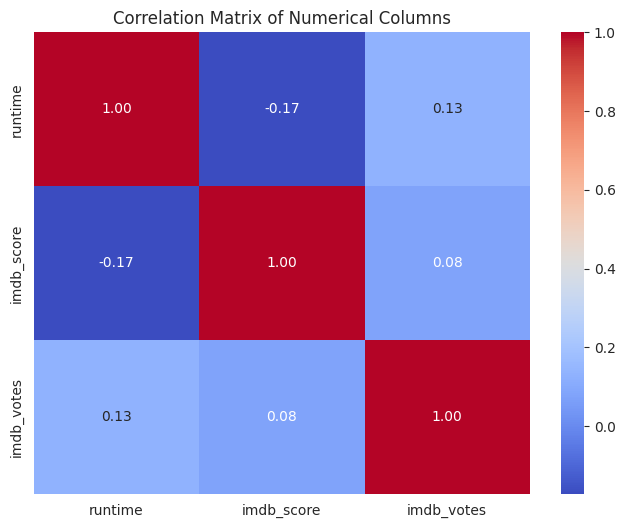

In [15]:
# Create a correlation heatmap for numerical columns
numerical_cols = ['runtime', 'imdb_score', 'imdb_votes']
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

In [16]:
# Save the cleaned DataFrame to a CSV file
df.to_csv('cleaned_netflix_data.csv', index=False)